In [2]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
# read csv file
df = pd.read_csv("crim_hist_page_linear.csv")

In [274]:
df.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'geo', 'TIME_PERIOD',
       'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [275]:
shape = df.shape
shape

(314, 8)

In [276]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     314 non-null    object 
 1   LAST UPDATE  314 non-null    object 
 2   freq         314 non-null    object 
 3   unit         314 non-null    object 
 4   geo          314 non-null    object 
 5   TIME_PERIOD  314 non-null    int64  
 6   OBS_VALUE    314 non-null    int64  
 7   OBS_FLAG     0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 19.8+ KB


In [291]:
df

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,AT,1991,468832,NaN
1,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,AT,1992,502440,NaN
2,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,AT,1993,493786,NaN
3,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,AT,1994,504568,NaN
4,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,AT,1995,486433,NaN
...,...,...,...,...,...,...,...,...
309,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,UKN,1996,68549,NaN
310,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,UKN,1997,62222,NaN
311,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,UKN,1998,109053,NaN
312,ESTAT:CRIM_HIST$DEFAULTVIEW(1.0),26/02/15 23:00:00,A,NR,UKN,1999,119111,NaN


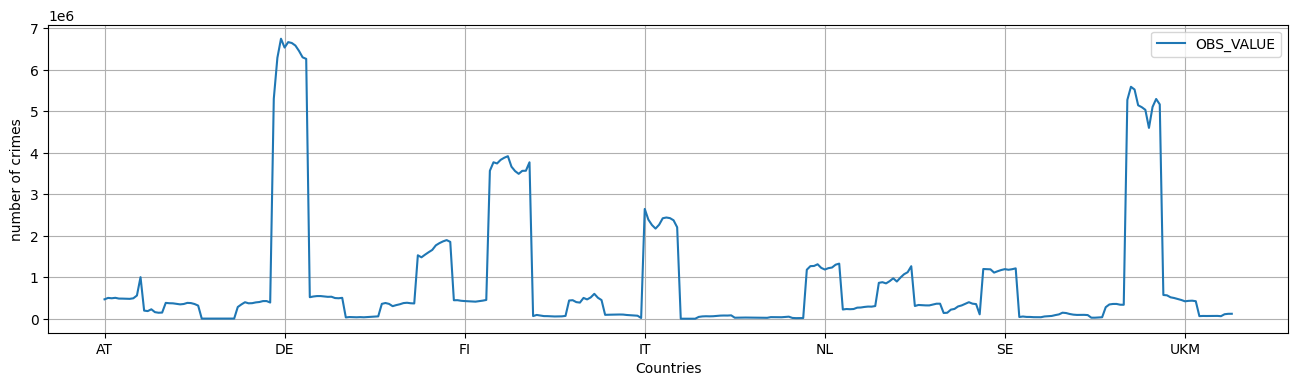

In [324]:
#draw a line graph that shows all crimes from 1991 to 2000 grouped by countries
df.plot(figsize=(16,4),x='geo',y='OBS_VALUE')
plt.ylabel('number of crimes')
plt.xlabel('Countries')
plt.grid()

AxesSubplot(0.125,0.11;0.775x0.77)


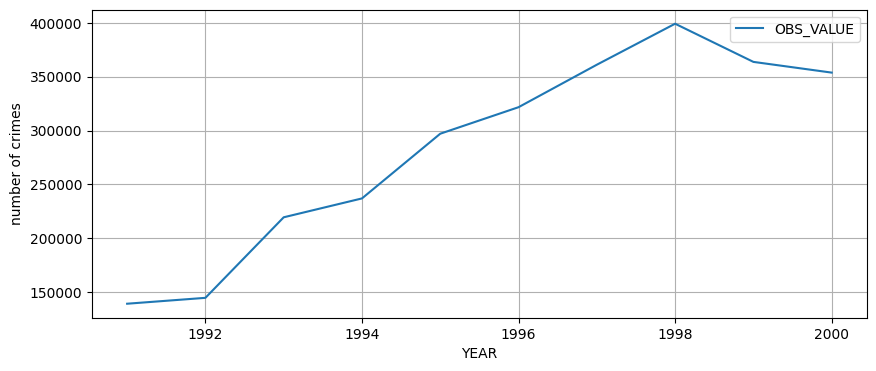

In [5]:
# select only the romanian data
romanianData = df.loc[df['geo'] == 'RO']
# draw the linechart that shows the time period and the value
print(romanianData.plot(figsize=(10,4),x='TIME_PERIOD',y='OBS_VALUE'))
plt.ylabel('number of crimes')
plt.xlabel('YEAR')
plt.grid()


AxesSubplot(0.125,0.11;0.775x0.77)


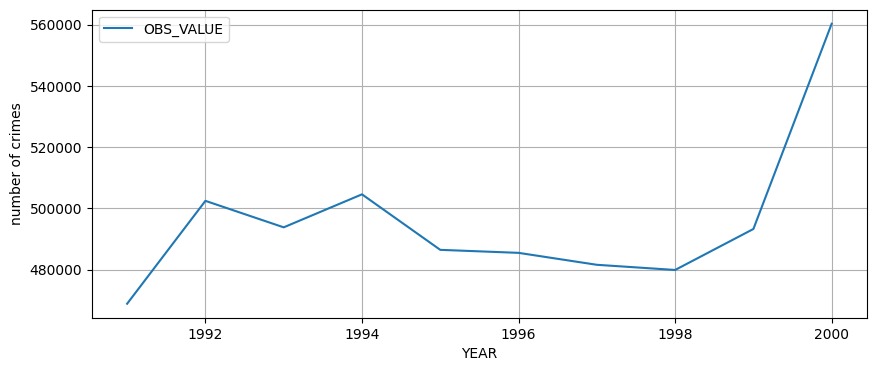

In [303]:
austrianData = df.loc[df['geo'] == 'AT']
austrianData
print(austrianData.plot(figsize=(10,4),x='TIME_PERIOD',y='OBS_VALUE'))
plt.ylabel('number of crimes')
plt.xlabel('YEAR')
plt.grid()


AxesSubplot(0.125,0.11;0.775x0.77)


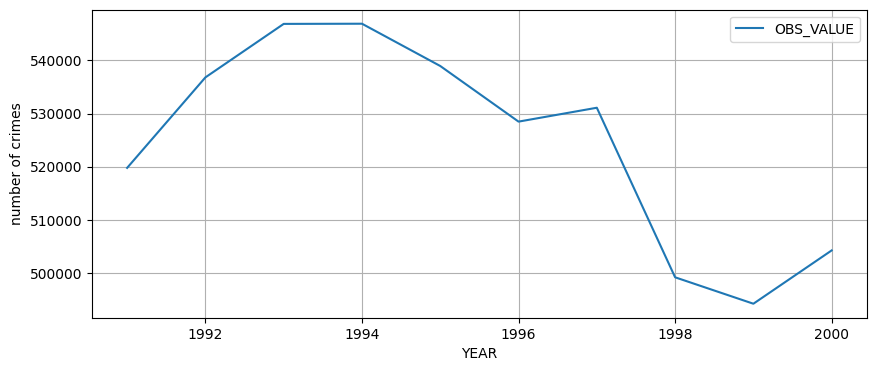

In [305]:
dutchData = df.loc[df['geo'] == 'DK']
dutchData
print(dutchData.plot(figsize=(10,4),x='TIME_PERIOD',y='OBS_VALUE'))
plt.ylabel('number of crimes')
plt.xlabel('YEAR')
plt.grid()

AxesSubplot(0.125,0.11;0.775x0.77)


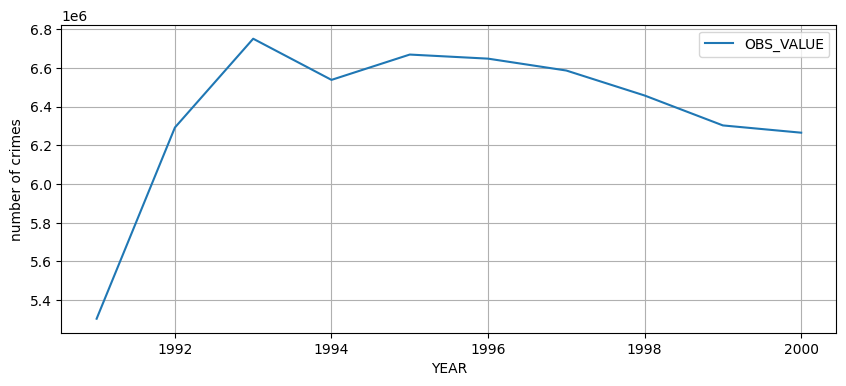

In [306]:
germanData = df.loc[df['geo'] == 'DE']
germanData
print(germanData.plot(figsize=(10,4),x='TIME_PERIOD',y='OBS_VALUE'))
plt.ylabel('number of crimes')
plt.xlabel('YEAR')
plt.grid()


AxesSubplot(0.125,0.11;0.775x0.77)


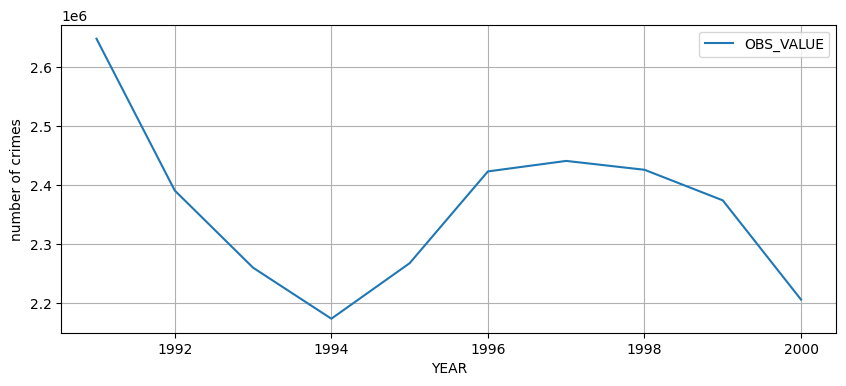

In [307]:
italianData = df.loc[df['geo'] == 'IT']
italianData
print(italianData.plot(figsize=(10,4),x='TIME_PERIOD',y='OBS_VALUE'))
plt.ylabel('number of crimes')
plt.xlabel('YEAR')
plt.grid()

In [8]:
# create a new dataset with only the geo location, time period and crimes
nd = df[['geo','TIME_PERIOD','OBS_VALUE']]
# select only the data relevant for 1991
year1991 = nd.loc[nd['TIME_PERIOD'] == 1991]
# select only the data relevant for 2000
year2000 = nd.loc[nd['TIME_PERIOD'] == 2000]
# because the data is not consistent, some contries don't exist in 1991 compared to 2000
# to solve this issue, an intersection agains the geo location information is done 
sameCountries = pd.Index(year2000.geo).intersection(pd.Index(year1991.geo))
# and a list of countries that match both sets is returned
countryList = list(sameCountries)
# noarow the data for only the specific country location for 1991 and 2000
goodData1991 = year1991.loc[year1991['geo'].str.contains('|'.join(countryList))]
goodData2000 = year2000.loc[year2000['geo'].str.contains('|'.join(countryList))]

<AxesSubplot: xlabel='Country'>

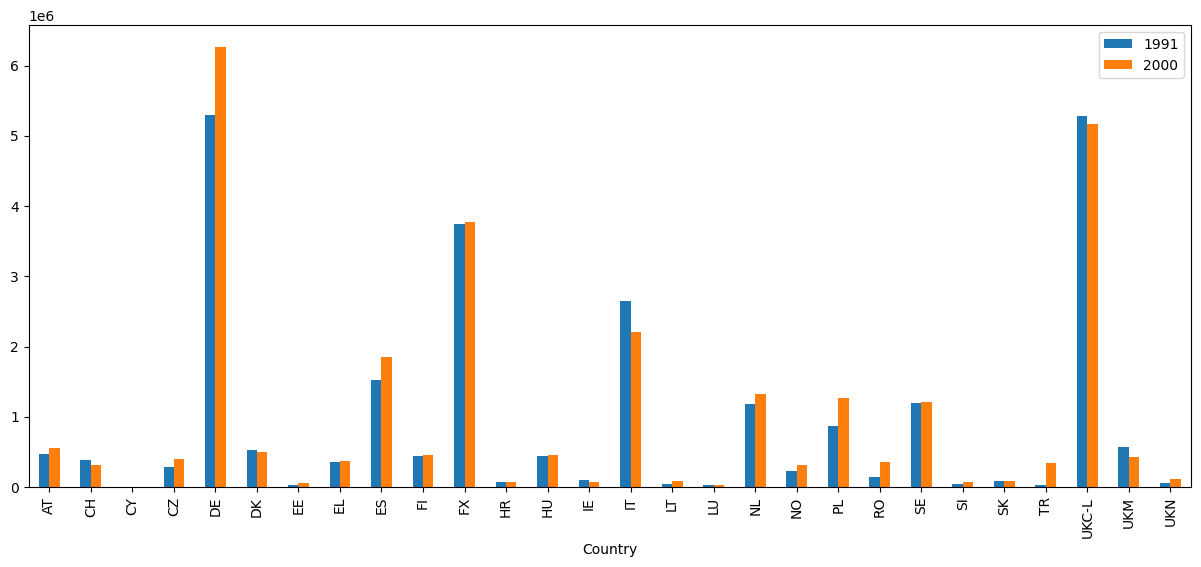

In [11]:
#create the datase to display the difference between 1991 and 2000 against individual countries
data= {'Country':countryList,'1991':list(goodData1991.OBS_VALUE),'2000':list(goodData2000.OBS_VALUE)}
mean_values = pd.DataFrame(data)
mean_values
#draw the bar chart
mean_values.plot(figsize=(15,6),x='Country', y=['1991','2000'],kind='bar')

In [315]:
# narrow down the dataset to the desired countries
countriesOfInterest = ['RO','AT','DE','IT','DK']
# take out the interest data from the specifc year's data
interestData1991 = year1991.loc[year1991['geo'].str.contains('|'.join(countriesOfInterest))]
interestData2000 = year2000.loc[year2000['geo'].str.contains('|'.join(countriesOfInterest))]


<AxesSubplot: xlabel='Country'>

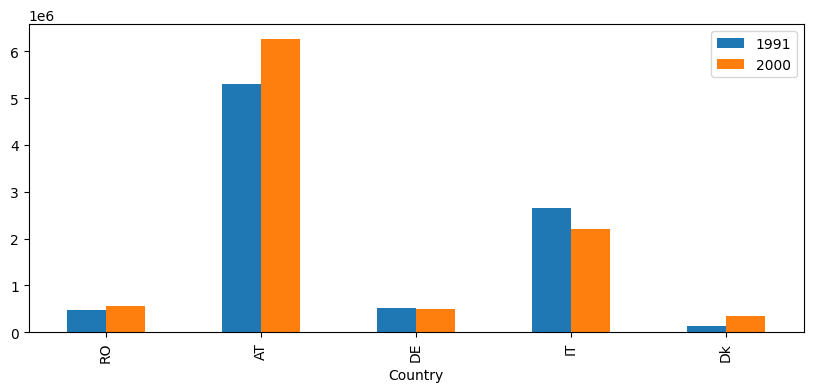

In [326]:
#create a new dataset that groups the info by country and crime value on specific countries
data= {'Country':['RO','AT','DE','IT','Dk'],'1991':list(interestData1991.OBS_VALUE),'2000':list(interestData2000.OBS_VALUE)}
mean_values = pd.DataFrame(data)
mean_values
#display the chart
mean_values.plot(figsize=(10,4),x='Country', y=['1991','2000'],kind='bar')

In [332]:
# function that gets mean of crimes on a specific year
def getYearlyData(year):
    return df.loc[df['TIME_PERIOD']==year]['OBS_VALUE'].mean()
# get all available years. Transform the dataset to a SET to get rid of the duplicates and then to a list for ease of work
allYears = list(set(df.TIME_PERIOD))
#itarate over all years and return a list of crime avrages
yearMeanCrimes = list(map(getYearlyData,allYears))

In [333]:
yearMeanCrimes

[930958.6785714285,
 981303.0357142857,
 970753.1724137932,
 948168.6551724138,
 906815.5161290322,
 878974.96875,
 873414.90625,
 869436.9696969697,
 949497.2647058824,
 884858.2894736842]

In [334]:
#create a new dataset that groups the year and mean of crimes
yearlyMeanDataset = {'Year': allYears,'Mean of Crimes':yearMeanCrimes}
yearlyDataFrame = pd.DataFrame(yearlyMeanDataset)
yearlyDataFrame

,Year,Mean of Crimes
0,1991,930958.678571
1,1992,981303.035714
2,1993,970753.172414
3,1994,948168.655172
4,1995,906815.516129
5,1996,878974.968750
6,1997,873414.906250
7,1998,869436.969697
8,1999,949497.264706
9,2000,884858.289474


AxesSubplot(0.125,0.11;0.775x0.77)


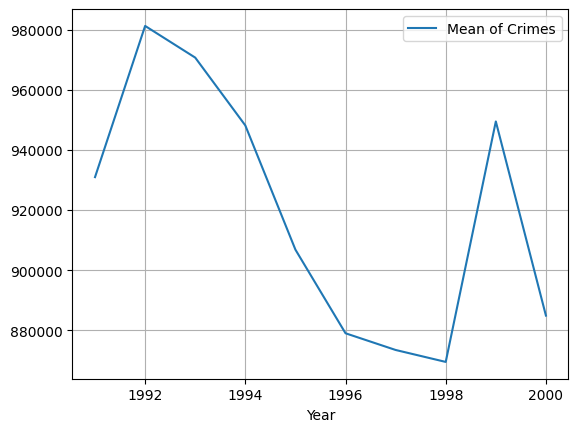

In [337]:
# draw the graph
print(yearlyDataFrame.plot(x='Year',y='Mean of Crimes',kind='line'))
plt.grid()